In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
from matplotlib import font_manager, rc
import platform 

# 그래프에서 한글 표기를 위한,
# 글자체 변경(윈도우, 맥os 각각의 경우에 대해서 처리)
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [4]:
#각 지역마다 필요한 열만 추출 -> 간단하게 코드 작성

path = './Close_School/'
files = os.listdir(path)

cs = pd.DataFrame()

for file in files:
    data = pd.read_excel(path + file)
    cs = pd.concat([cs,data])
    
cs_total = cs.reset_index(drop = True)

In [5]:
#결측값 확인
cs_total.isna().sum()

시도교육청     0
폐교명       0
폐교년도      0
지역교육청    40
급별        1
활용현황      0
주소        0
dtype: int64

In [6]:
#필요한 컬럼 결측치 확인
cs_total['급별'].unique()

array(['중', '초', '고', nan, '증'], dtype=object)

In [7]:
cs_total['급별'] = cs_total['급별'].replace('증','중')

In [8]:
cs_total['급별'].unique()

array(['중', '초', '고', nan], dtype=object)

In [17]:
#nan 결측치 대체 (str.contains)

for i in range(len(cs_total)):
    if cs_total['급별'].isna()[i] == True:
        
        if cs_total['폐교명'].str.contains('초등학교')[i] == True:
            cs_total['급별'][i] == '초'
            
        elif cs_total['폐교명'].str.contains('중학교')[i] == True:
            cs_total['급별'][i] == '중'
            
        else:
            cs_total['급별'][i] == '고'

In [ ]:
#nan 결측치 대체 (find)

for i in range(len(cs_total)):
    if cs_total['급별'].isna()[i] == True:
        
        if cs_total['폐교명'][i].find('초'):
            cs_total['급별'][i] == '초'
            
        elif cs_total['폐교명'][i].find('중'):
            cs_total['급별'][i] == '중'
            
        else:
            cs_total['급별'][i] == '고'

In [14]:
#필요 데이터만 추출
cs_close = (cs_total["폐교년도"] >= 2001) & (cs_total["폐교년도"] <= 2020)
cs_totals = cs_total[cs_close]
cs_totals = cs_totals[['시도교육청', '폐교년도', '급별']]

In [15]:
#필요한 컬럼만 둔 DataFrame
cs_totals

,시도교육청,폐교년도,급별
0,부산,2009,중
1,부산,2007,초
2,부산,2010,고
3,부산,2016,초
4,부산,2020,중
...,...,...,...
1349,울산,2016,초
1350,울산,2016,초
1358,울산,2012,초
1362,울산,2016,초


In [16]:
cs_totals["폐교년도"] = cs_totals["폐교년도"].astype("str")

In [18]:
cs_totals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 0 to 1363
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도교육청   591 non-null    object
 1   폐교년도    591 non-null    object
 2   급별      590 non-null    object
dtypes: object(3)
memory usage: 18.5+ KB


In [22]:
cs_all = cs_totals.drop(['급별'], axis = 'columns')

In [23]:
cs_all

,시도교육청,폐교년도
0,부산,2009
1,부산,2007
2,부산,2010
3,부산,2016
4,부산,2020
...,...,...
1349,울산,2016
1350,울산,2016
1358,울산,2012
1362,울산,2016


In [25]:
cs_all = cs_all.groupby(('폐교년도'),  as_index =False).count()

In [26]:
cs_all

,폐교년도,시도교육청
0,2001,28
1,2002,26
2,2003,10
3,2004,16
4,2005,21
5,2006,11
6,2007,40
7,2008,36
8,2009,42
9,2010,28


In [27]:
#시각화 
cs_all= cs_all.rename(columns = {'시도교육청':'폐교 수'})

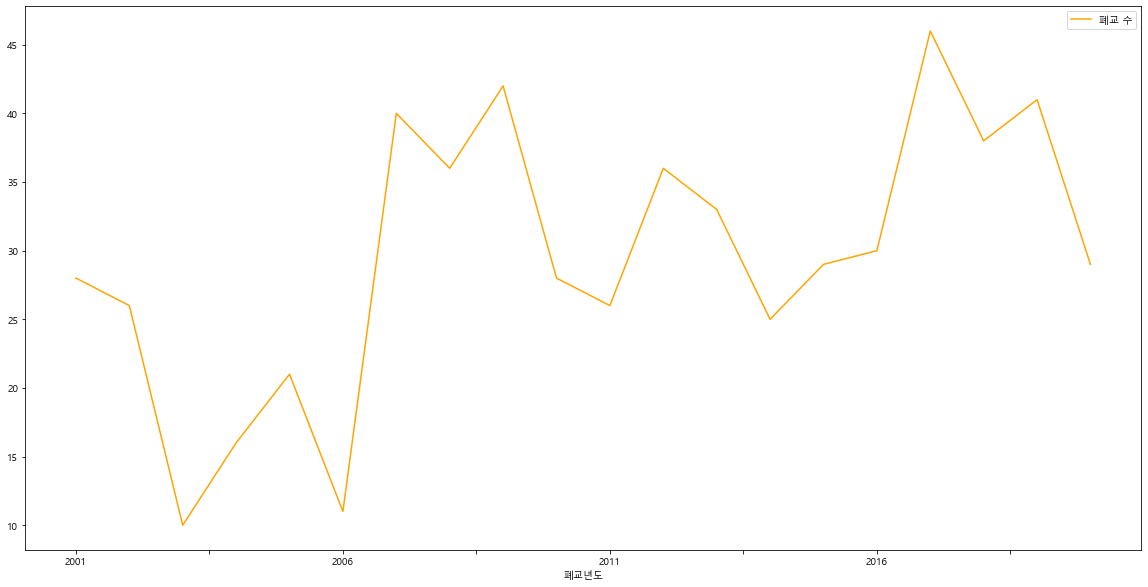

In [29]:
#시계열그래프 시각화_1

cs_all.plot(figsize = (20, 10), kind = 'line', x ='폐교년도', y ='폐교 수', color ='orange')

plt.show()

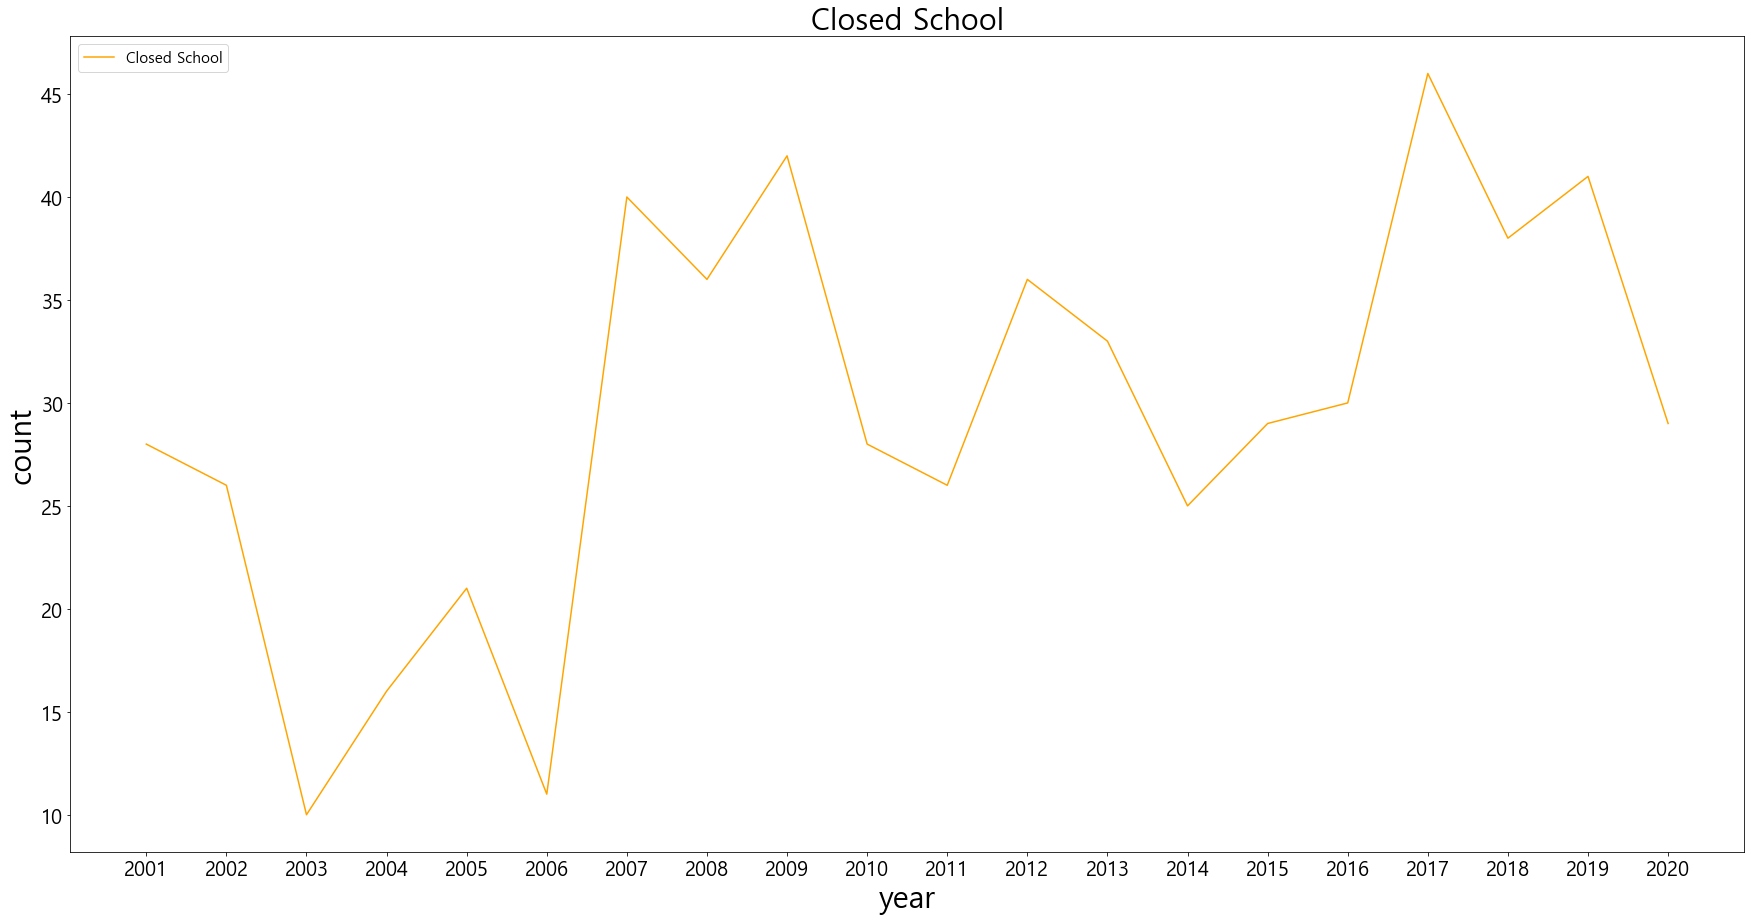

<Figure size 432x288 with 0 Axes>

In [31]:
#시계열그래프 시각화_2

#그래프 크기
plt.figure(figsize = (30, 15))

#그래프 x 및 y행에 대한 데이터 지정
plt.plot(cs_all['폐교년도'], cs_all['폐교 수'], color = 'orange', label='Closed School')

#parameters = {'axes.labelsize' :50, 'axes.titlesize' :15}
#plt.rcParams.update(parameters)

#parameters = {'xtick.labelsize' :20, 'ytick.labelsize' :20}
#plt.rcParams.update(parameters)

#x 눈금레이블 크기
plt.xticks(fontsize = 20)

#y 눈금레이블 크기
plt.yticks(fontsize = 20)

#x레이블 제목 크기 
plt.xlabel('year', fontsize = 30)

#y레이블 제목 크기
plt.ylabel('count', fontsize = 30)

#그림 제목 크기
plt.title('Closed School', fontsize = 30)

#범례위치 및 크기 지정
plt.legend(loc = 'upper left', fontsize = 15)

plt.show()

plt.savefig('close_school_all.png')